In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn.apionly as sns

c:\users\lycurgus orion\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [10]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
iris = sns.load_dataset('iris')

In [9]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris.shape

(150, 5)

In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


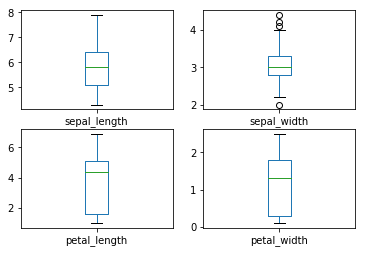

In [17]:
# box and whisker plots
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1321E1D0>,
      dtype=object)

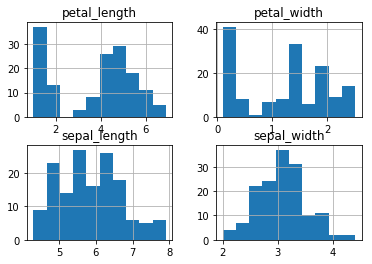

In [18]:
iris.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11EBF090>,
      dtype=object)

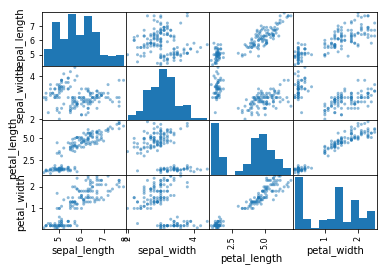

In [19]:
scatter_matrix(iris)

In [20]:
# Split-out validation dataset
array = iris.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [32]:
scoring = 'accuracy'
seed = 10

In [22]:
# Spot Check Algorithms

In [23]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [24]:
# Evaluate each of these models one by one

In [25]:
results = []

In [26]:
names = []

In [34]:
for name, model in models:
    kFold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    res = "%s : %f(%f)" % (name, cv_results.mean(), cv_results.std())
    print(res)

LR : 0.966667(0.040825)
LDA : 0.975000(0.038188)
KNN : 0.983333(0.033333)
CART : 0.966667(0.040825)
NB : 0.975000(0.053359)
SVM : 0.991667(0.025000)


In [36]:
svm = SVC()

In [37]:
svm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
predictions = svm.predict(X_validation)

In [39]:
accuracy_score(Y_validation, predictions)

0.9333333333333333

In [43]:
print(confusion_matrix(Y_validation, predictions))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


In [44]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       1.00      0.83      0.91        12
  virginica       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30



In [46]:
help("sklearn.metrics.confusion_matrix")

Help on function confusion_matrix in sklearn.metrics:

sklearn.metrics.confusion_matrix = confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels t

In [47]:
help("sklearn.linear_model.LogisticRegression")

Help on class LogisticRegression in sklearn.linear_model:

sklearn.linear_model.LogisticRegression = class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' libra